# Generate DET Curves specific to the different subgroups of the Balance Faces in the Wild (BFW) dataset.

Uses the data in `data/bfw-datatable.pkl` to evaluate DET curves of different attributes.

In [18]:
import pathlib
path_package=f'{str(pathlib.Path().home())}/bfw-data/facerec-bias-bfw/code'
import sys
if path_package not in sys.path:
    sys.path.append(path_package)

In [19]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.1)
# Load out custom tool for loading and processing the data
from facebias.io import load_bfw_datatable
from facebias.visualization import draw_det_curve
from facebias.metrics import calculate_det_curves

## Load the data

Read in the data as a pandas.DataFrame and show the first few rows.

In [20]:
data = load_bfw_datatable('../../data/bfw-datatable.pkl')
data.head()

,fold,p1,p2,label,id1,id2,att1,att2,score,distance,vgg16,resnet50,senet50,a1,a2,g1,g2,e1,e2,label1
0,1,asian_females/n000009/0010_01.jpg,asian_females/n000009/0043_01.jpg,1,0,0,asian_females,asian_females,0.820039,80.010742,0.820039,0.703258,0.679089,AF,AF,F,F,A,A,1
1,1,asian_females/n000009/0010_01.jpg,asian_females/n000009/0120_01.jpg,1,0,0,asian_females,asian_females,0.719199,88.251282,0.719199,0.523613,0.594268,AF,AF,F,F,A,A,1
2,1,asian_females/n000009/0010_01.jpg,asian_females/n000009/0122_02.jpg,1,0,0,asian_females,asian_females,0.732029,84.709984,0.732029,0.527567,0.643680,AF,AF,F,F,A,A,1
3,1,asian_females/n000009/0010_01.jpg,asian_females/n000009/0188_01.jpg,1,0,0,asian_females,asian_females,0.607093,110.817825,0.607093,0.348211,0.458883,AF,AF,F,F,A,A,1
4,1,asian_females/n000009/0010_01.jpg,asian_females/n000009/0205_01.jpg,1,0,0,asian_females,asian_females,0.629153,97.704445,0.629153,0.384273,0.494913,AF,AF,F,F,A,A,1


In [21]:
subgroups = data.groupby('a1')

115455 pairs
115542 pairs
115364 pairs
115459 pairs
115595 pairs
115458 pairs
115536 pairs
115489 pairs


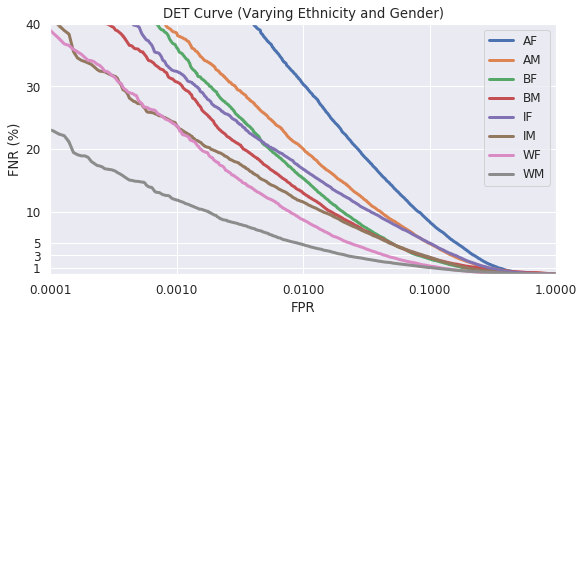

In [39]:
rates = {}
li_subgroups = subgroups.groups
fig = plt.figure(figsize=(8, 8), constrained_layout=True)
gs = fig.add_gridspec(1, 3)

ax1 = fig.add_subplot(gs[0, :])
for i, subgroup in enumerate(li_subgroups):
    # for each subgroup
    df = subgroups.get_group(subgroup)
    print('{} pairs'.format(len(df)))
    labels, scores = df['label'].values.astype(int), df['senet50'].values
    det_data = calculate_det_curves( labels, scores)
    
    df2 = pd.DataFrame([[x[0], x[1], x[2], y_formatted[j]] for j, x in enumerate(det_data)])
    ax1 = draw_det_curve(df2[0].values, df2[1].values, ax=ax1, label=subgroup, title='DET Curve (Varying Ethnicity and Gender)')
    

KeyboardInterrupt: 

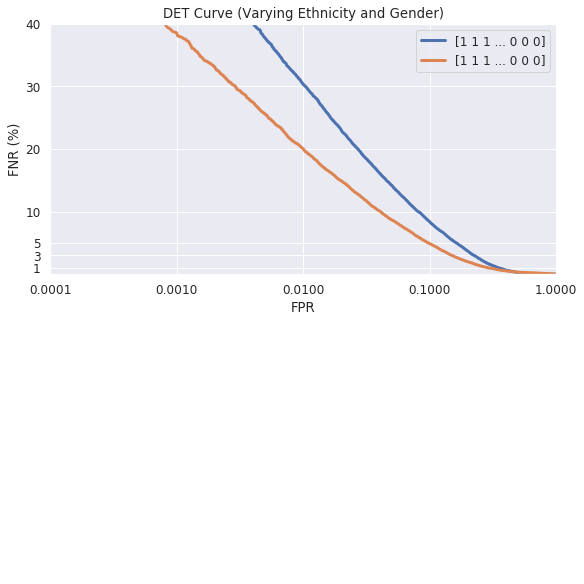

In [ ]:

subgroups = data.groupby('g1')
li_subgroups = subgroups.groups

for i, subgroup in enumerate(li_subgroups):
    # per gender
    df = subgroups.get_group(subgroup)


    scores, labels = df['senet50'], df['label'].values.astype(int)

    det_data = calculate_det_curves(labels, scores)
    rates[subgroup] = pd.DataFrame([[x[0], x[1], x[2]] for x in det_data])

    print('Completed {}\n'.format(cats[i]))

ax2 = fig.add_subplot(gs[1, 0])
for i, cat in enumerate(np.unique(li_subgroups)):
    ax2 = draw_det_curve(rates[cat][0], rates[cat][1], ax=ax2, label=cat, xlog=True, title='DET Curve (Varying Gender)')


115455 pairs
processing vgg16
processing resnet50
processing senet50
115542 pairs
processing vgg16
processing resnet50
processing senet50
115364 pairs
processing vgg16
processing resnet50
processing senet50
115459 pairs
processing vgg16
processing resnet50
processing senet50
115595 pairs
processing vgg16
processing resnet50
processing senet50
115458 pairs
processing vgg16
processing resnet50
processing senet50
115536 pairs
processing vgg16
processing resnet50
processing senet50
115489 pairs
processing vgg16
processing resnet50
processing senet50


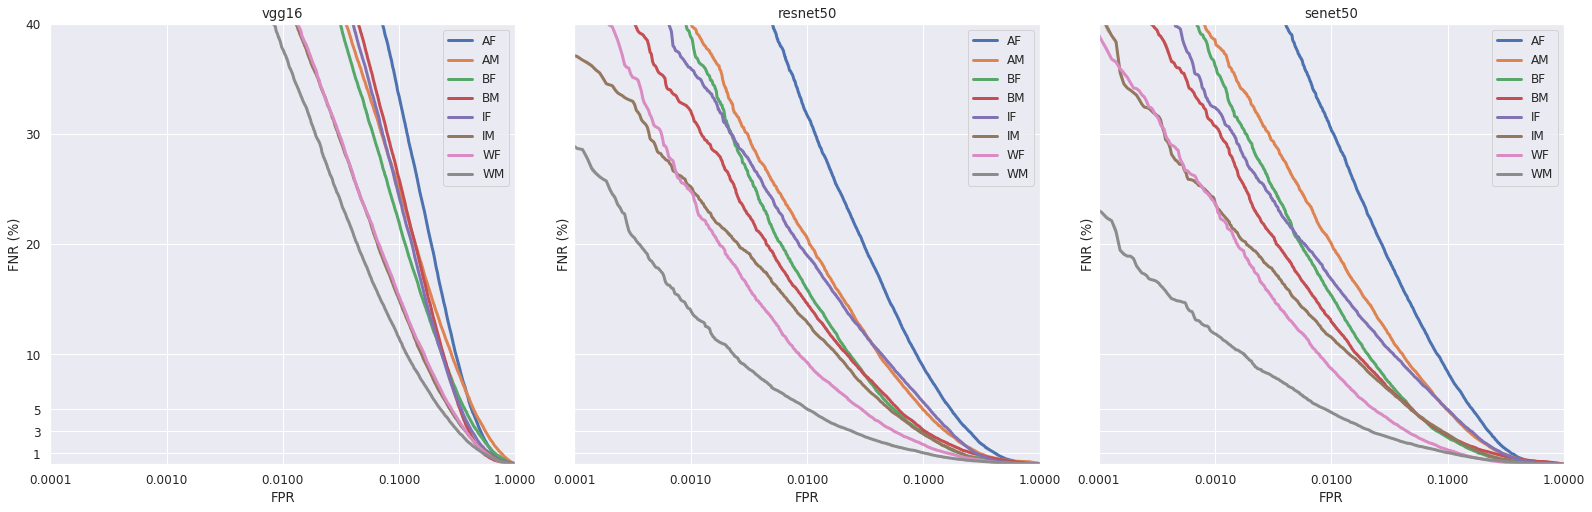

In [52]:
rates = {}
li_subgroups = subgroups.groups
fig, axs = plt.subplots(1, 3, figsize=(22, 7), constrained_layout=True, facecolor='white', sharey=True)
# gs = fig.add_gridspec(1, 3)

# ax1 = fig.add_subplot(gs[0, :])
models = ['vgg16','resnet50', 'senet50']

obin="inter/{}/det_{}.pkl"
#obin="inter/{}/{}_ax.pkl"
for i, subgroup in enumerate(li_subgroups):
    # for each subgroup

    df = subgroups.get_group(subgroup)
    labels = df['label'].values.astype(int)
    print('{} pairs'.format(len(df)))
    for k, model in enumerate(models):
        print(f"processing {model}")
        scores = df[model].values
        det_data = calculate_det_curves(labels, scores)
        pd.to_pickle(det_data, obin.format(model,subgroup))
        df2 = pd.DataFrame([[x[0], x[1], x[2], y_formatted[j]] for j, x in enumerate(det_data)])
        axs[k] = draw_det_curve(df2[0].values, df2[1].values, ax=axs[k], label=subgroup, title=model)

fig.savefig('SDMs2.png', facecolor=fig.get_facecolor(), edgecolor='none', transparent=True)
fig.savefig('SDMs2.pdf', facecolor=fig.get_facecolor(), edgecolor='none', transparent=True)

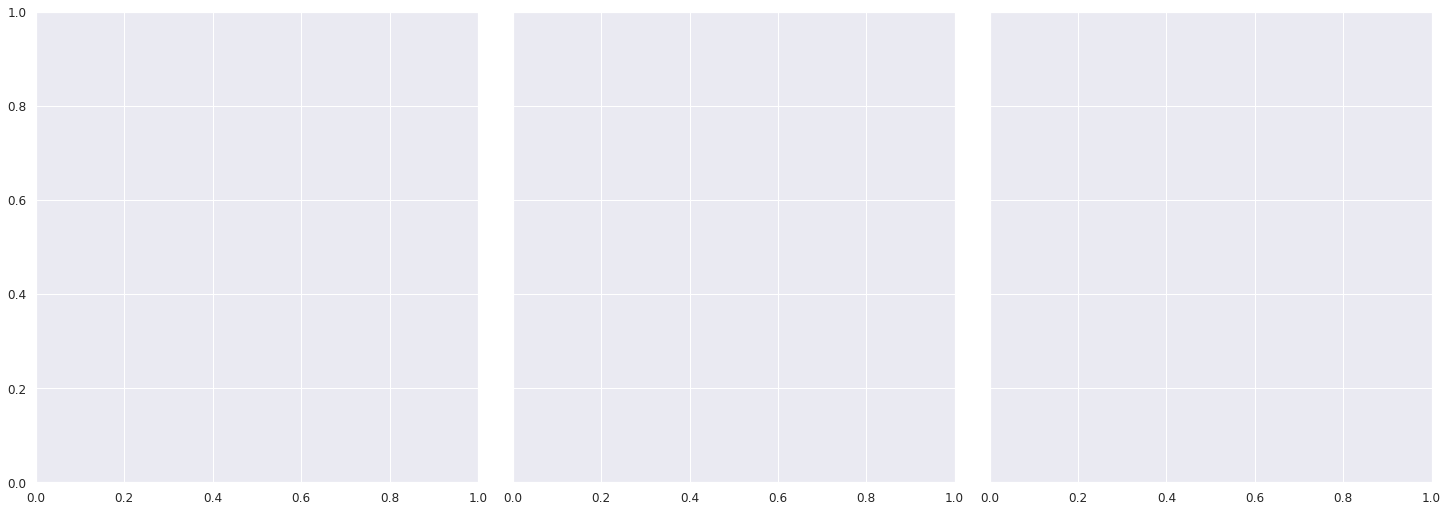

In [47]:
help(plt.subplots)

Help on function subplots in module matplotlib.pyplot:

subplots(nrows=1, ncols=1, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)
    Create a figure and a set of subplots.
    
    This utility wrapper makes it convenient to create common layouts of
    subplots, including the enclosing figure object, in a single call.
    
    Parameters
    ----------
    nrows, ncols : int, optional, default: 1
        Number of rows/columns of the subplot grid.
    
    sharex, sharey : bool or {'none', 'all', 'row', 'col'}, default: False
        Controls sharing of properties among x (`sharex`) or y (`sharey`)
        axes:
    
            - True or 'all': x- or y-axis will be shared among all
              subplots.
            - False or 'none': each subplot x- or y-axis will be
              independent.
            - 'row': each subplot row will share an x- or y-axis.
            - 'col': each subplot column will share an x- or y-axis.
    
        Wh

In [51]:
subgroup

'WM'